# Лабораторная работа №2
Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Выполнил: Пакало А. С., РТ5-61Б

# Импортирование необходимых библиотек, подготовка окружения

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Текстовое описание набора данных
В качестве набора данных был выбран датасет [San Francisco Building Permits](https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data)

Описание аттрибутов:

In [2]:
attribute_description = pd.read_excel('data/BuildingPermitsAttributeDescription.xlsx')
attribute_description.drop('Sl No', inplace=True, axis=1)
attribute_description

,Column name,Description
0,Permit Number,Number assigned while filing
1,Permit Type,Type of the permit represented numerically.
2,Permit Type Definition,"Description of the Permit type, for example\n ..."
3,Permit Creation Date,"Date on which permit created, later than \nor ..."
4,Block,Related to address
5,Lot,Related to address
6,Street Number,Related to address
7,Street Number Suffix,Related to address
8,Street Name,Related to address
9,Street Name Suffix,Related to address


## Загрузка набора данных

In [3]:
# Had error about mixed dtypes of cols 22 and 32.
data = pd.read_csv('data/BuildingPermits.csv', sep=",", dtype={'Voluntary Soft-Story Retrofit': 'object', 'TIDF Compliance': 'object'})

# Основные характеристики датасета

In [4]:
data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [5]:
data.tail()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656
198899,M864287,8,otc alterations permit,12/07/2017,0160,006,838,NaN,Pacific,Av,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489796283803


## Размер датасета (кол-во строк, кол-во колонок)

In [6]:
num_of_rows, num_of_columns = data.shape
print(f'Размер датасета: {num_of_rows} строк, {num_of_columns} колонок')

Размер датасета: 198900 строк, 43 колонок


## Определение типов

In [7]:
data.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


Некоторые колонки имеют неверные типы данных, их следует преобразовать.

In [8]:
data = data.astype({'Zipcode': 'category'})
data.dtypes

Permit Number                               object
Permit Type                                  int64
Permit Type Definition                      object
Permit Creation Date                        object
Block                                       object
Lot                                         object
Street Number                                int64
Street Number Suffix                        object
Street Name                                 object
Street Suffix                               object
Unit                                       float64
Unit Suffix                                 object
Description                                 object
Current Status                              object
Current Status Date                         object
Filed Date                                  object
Issued Date                                 object
Completed Date                              object
First Construction Document Date            object
Structural Notification        

# Проверка на наличие пустых значений

In [9]:
data.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

# Обработка пропусков в данных


## Удаление признаков, не содержащих данных
Удаляем из набора данных колонки, в которых **все** значения неопределены.

In [10]:
data_dropped_na_columns = data.dropna(axis=1, how='all')
(data.shape[1], data_dropped_na_columns.shape[1])

(43, 43)

## Удаление записей, не содержащих данных
Удаляем из набора данных ряды, в которых **все** значения неопределены.

In [11]:
data_dropped_na_columns_and_rows = data_dropped_na_columns.dropna(axis=0, how='all')
(data.shape, data_dropped_na_columns_and_rows.shape)

((198900, 43), (198900, 43))

## Удаление признаков не подлежащих восстановлению

In [12]:
# Determines whether columns has numeric values.
def is_numeric(col: pd.Series): 
    dt = str(col.dtype)
    return dt=='float64' or dt=='int64'

# Searching for columns with na.
rows_total_count = data_dropped_na_columns_and_rows.shape[0]

indexes_of_num_cols_with_na = []
cols_stats = []

for col_i in data_dropped_na_columns_and_rows.columns:
    col = data_dropped_na_columns_and_rows[col_i]
    null_count_in_col = data_dropped_na_columns_and_rows[col.isnull()].shape[0]
    
    if null_count_in_col>0 and is_numeric(col):
        perc = round((null_count_in_col / rows_total_count) * 100, 2)
        col_stats = {
            'i': col_i,
            'dtype': col.dtype,
            'null_count': null_count_in_col,
            'perc': perc
        }
        cols_stats.append(col_stats)
        indexes_of_num_cols_with_na.append(col_i)



for col_stats in cols_stats:
    print(f'Колонка {col_stats["i"]}:\
        \n\tТип данных {col_stats["dtype"]}. Количество пустых значений {col_stats["null_count"]}, {col_stats["perc"]}%.')

Колонка Unit:        
	Тип данных float64. Количество пустых значений 169421, 85.18%.
Колонка Number of Existing Stories:        
	Тип данных float64. Количество пустых значений 42784, 21.51%.
Колонка Number of Proposed Stories:        
	Тип данных float64. Количество пустых значений 42868, 21.55%.
Колонка Estimated Cost:        
	Тип данных float64. Количество пустых значений 38066, 19.14%.
Колонка Revised Cost:        
	Тип данных float64. Количество пустых значений 6066, 3.05%.
Колонка Existing Units:        
	Тип данных float64. Количество пустых значений 51538, 25.91%.
Колонка Proposed Units:        
	Тип данных float64. Количество пустых значений 50911, 25.6%.
Колонка Plansets:        
	Тип данных float64. Количество пустых значений 37309, 18.76%.
Колонка Existing Construction Type:        
	Тип данных float64. Количество пустых значений 43366, 21.8%.
Колонка Proposed Construction Type:        
	Тип данных float64. Количество пустых значений 43162, 21.7%.
Колонка Supervisor Distr

In [13]:
# Get table consisting of numerical columns that have na.
data_num_na_init = data_dropped_na_columns_and_rows[indexes_of_num_cols_with_na]
data_num_na_init

,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District
0,NaN,6.0,NaN,4000.0,4000.0,143.0,NaN,2.0,3.0,NaN,3.0
1,0.0,7.0,NaN,1.0,500.0,NaN,NaN,2.0,3.0,NaN,3.0
2,NaN,6.0,6.0,20000.0,NaN,39.0,39.0,2.0,1.0,1.0,3.0
3,0.0,2.0,2.0,2000.0,2000.0,1.0,1.0,2.0,5.0,5.0,3.0
4,NaN,3.0,NaN,100000.0,100000.0,NaN,NaN,2.0,3.0,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...
198895,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
198896,NaN,4.0,4.0,5000.0,5000.0,4.0,4.0,2.0,5.0,5.0,NaN
198897,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
198898,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Некоторые колонки содержат слишком много пустых значений (больше 15%), если их попытаться заполнить, результат может сильно отличаться от реальности.
Стоит подумать над тем, чтобы их убрать совсем. Для этого проанализируем их значимость для анализа:
- Unit - корпус здания. Мы анализируем право на строительство всего здания, от конкретного корпуса это не зависит. Можно от этого атрибута избавиться.
- Existing Units - аналогично Units.
- Proposed Units - аналогично Units.

Остальные колонки имеют пропуски из-за нехватки информации. Например, если данные собирались после непосредственного принятия решения, некоторые атрибуты, связанные с предварительной оценкой параметров здания не известны. Так, Estimated Cost имеет намного больше пропусков, чем Revised Cost. Для подобных колонок мы не в состоянии восстановить значения на основе других параметров записи.

In [14]:
# Columns that have so many missing values that it's meaningless to restore them.
unrestorable_cols = [col_stats["i"] for col_stats in cols_stats if col_stats["perc"] > 15.0]

# Get table without unrestorable columns.
data_dropped_na = data_dropped_na_columns_and_rows.drop(columns=unrestorable_cols)
# Get table consisting of numberical columns that have na and that are ok to be imputed.
data_num_na = data_num_na_init.drop(columns=unrestorable_cols)

data_num_na

,Revised Cost,Supervisor District
0,4000.0,3.0
1,500.0,3.0
2,NaN,3.0
3,2000.0,3.0
4,100000.0,6.0
...,...,...
198895,1.0,NaN
198896,5000.0,NaN
198897,1.0,NaN
198898,1.0,NaN


## Заполнение пропущенных значений
Так как в датасете некоторые пропущенные значения относятся к категориальным признакам, например, `Unit Suffix`, мы не можем произвести замену 0.
Воспользуемся **импьютацией** (внедрением значений):

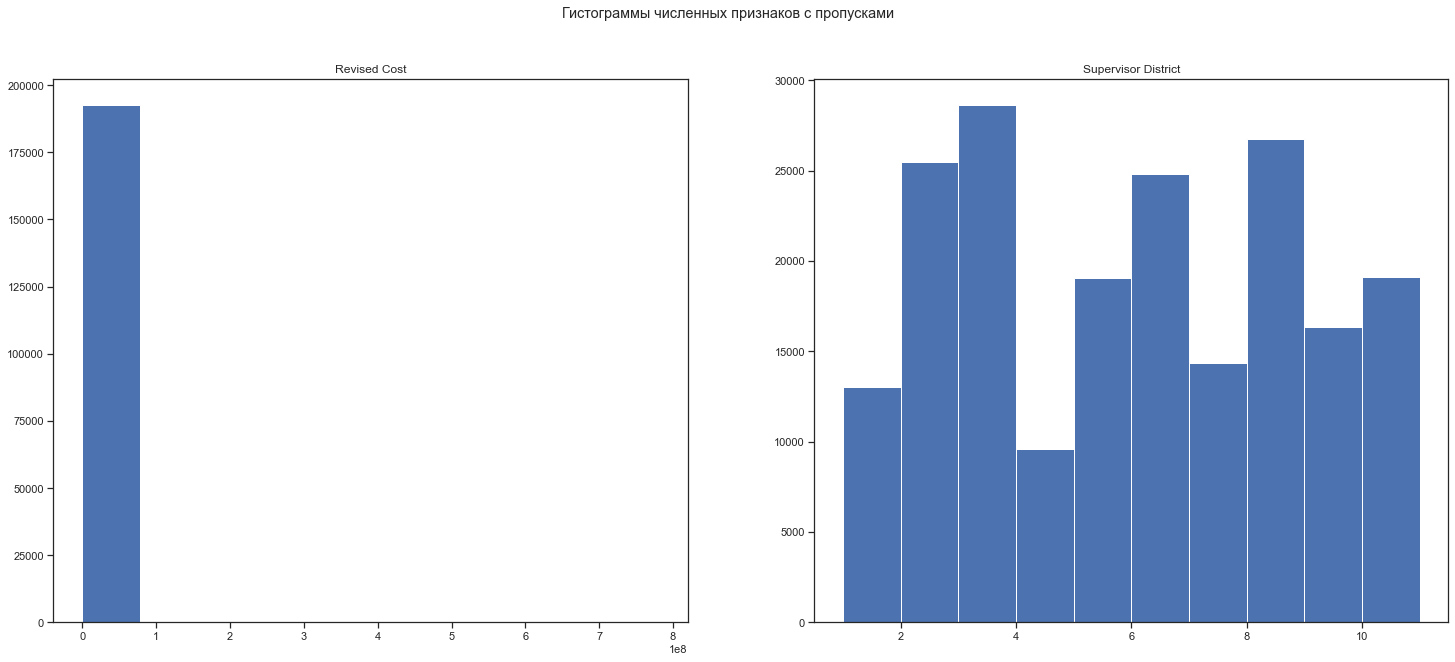

In [15]:
from math import ceil, floor

NUMBER_OF_COLS = 2
cols = data_num_na.columns
number_of_rows = ceil(len(cols) / NUMBER_OF_COLS)
# Squeeze transforms (0, cols) plot from 2d to 1d. We don't need that (cur_ax = axs[x][y] will be broken otherwise).
fig, axs = plt.subplots(nrows=number_of_rows, ncols=NUMBER_OF_COLS, figsize=(25, 10 * number_of_rows), squeeze=False)
fig.suptitle('Гистограммы численных признаков c пропусками')

# Maps 1d index into 2d index (for arranging plots).
def calculate_indexes(i: int, number_of_cols: int):
    return (floor(i / number_of_cols), i % number_of_cols)

for i, col_i in enumerate(cols):
    x, y = calculate_indexes(i, NUMBER_OF_COLS)
    cur_ax = axs[x][y]
    
    cur_ax.title.set_text(col_i)
    cur_ax.hist(data_num_na[col_i])

In [16]:
from sklearn.impute import SimpleImputer, MissingIndicator
# Indicates missing values by mapping them to True.
indicator = MissingIndicator()

def get_mask_missing_values_only(col_i: str):
    data_num_na__col_i = data_num_na[[col_i]]
    return indicator.fit_transform(data_num_na__col_i)

In [17]:
from enum import Enum, auto

class AutoName(Enum):
    # Auto generate value the same as the key.
    def _generate_next_value_(name, start, count, last_values):
        return name

class ImputeStrategy(str, AutoName):
    mean = auto()
    median = auto()
    most_frequent = auto()

In [18]:
from pandas import DataFrame

def impute_num_col_in_dataset(dataset: DataFrame, column: str, strategy: ImputeStrategy):
    data = dataset[[column]]
    
    imputer = SimpleImputer(strategy=strategy)
    data_num_imputed = imputer.fit_transform(data)

    # Check what was imputed.
    return data_num_imputed[get_mask_missing_values_only(column)]

# Closure for dataset.
def impute_num_col(column: str, strategy: ImputeStrategy):
    return impute_num_col_in_dataset(data_num_na, column, strategy)

Для `Revised Cost` следует применять стратегию моды, т.к. распределение одномодальное.

In [19]:
impute_num_col('Revised Cost', ImputeStrategy.most_frequent)

array([1., 1., 1., ..., 1., 1., 1.])

Для `Supervisor District` мы наблюдаем многомодальное распредление. Воспользуемся стратегией медианы.

In [20]:
impute_num_col('Supervisor District', ImputeStrategy.median)

array([6., 6., 6., ..., 6., 6., 6.])

## Обработка пропусков в категориальных данных

In [21]:
# Determines whether columns has categorial values.
def is_categorial(col: pd.Series): 
    dt = str(col.dtype)
    return dt=='object' or dt=='categorial'

# Searching for columns with na.
rows_total_count = data_dropped_na.shape[0]

indexes_of_cat_cols_with_na = []
cols_stats = []

for col_i in data_dropped_na.columns:
    col = data_dropped_na[col_i]
    null_count_in_col = data_dropped_na[col.isnull()].shape[0]
    
    if null_count_in_col>0 and is_categorial(col):
        perc = round((null_count_in_col / rows_total_count) * 100, 2)
        col_stats = {
            'i': col_i,
            'dtype': col.dtype,
            'null_count': null_count_in_col,
            'perc': perc
        }
        cols_stats.append(col_stats)
        indexes_of_cat_cols_with_na.append(col_i)


for col_stats in cols_stats:
    print(f'Колонка {col_stats["i"]}:\
        \n\tТип данных {col_stats["dtype"]}. Количество пустых значений {col_stats["null_count"]}, {col_stats["perc"]}%.')

Колонка Street Number Suffix:        
	Тип данных object. Количество пустых значений 196684, 98.89%.
Колонка Street Suffix:        
	Тип данных object. Количество пустых значений 2768, 1.39%.
Колонка Unit Suffix:        
	Тип данных object. Количество пустых значений 196939, 99.01%.
Колонка Description:        
	Тип данных object. Количество пустых значений 290, 0.15%.
Колонка Issued Date:        
	Тип данных object. Количество пустых значений 14940, 7.51%.
Колонка Completed Date:        
	Тип данных object. Количество пустых значений 101709, 51.14%.
Колонка First Construction Document Date:        
	Тип данных object. Количество пустых значений 14946, 7.51%.
Колонка Structural Notification:        
	Тип данных object. Количество пустых значений 191978, 96.52%.
Колонка Voluntary Soft-Story Retrofit:        
	Тип данных object. Количество пустых значений 198865, 99.98%.
Колонка Fire Only Permit:        
	Тип данных object. Количество пустых значений 180073, 90.53%.
Колонка Permit Expira

In [22]:
# Финальная версия датасета перед кодированием.
data_cleaned = data_dropped_na

## Кодирование категориальных признаков

Импорт необходимых инструментов

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Закодируем признак `Street Suffix` целочисленными значениями (label encoding)

In [24]:
# Уникальные значения столбца Street Suffix.
data_cleaned['Street Suffix'].unique()

array(['St', 'Av', 'Tr', 'Ct', 'Bl', 'Wy', 'Dr', nan, 'Rd', 'Cr', 'Pl',
       'Ln', 'Hy', 'Pk', 'Al', 'Pz', 'Wk', 'Rw', 'So', 'Sw', 'No', 'Hl'],
      dtype=object)

In [25]:
label_encoder = LabelEncoder()
label_encoded__StreetSuffix = label_encoder.fit_transform(data_cleaned['Street Suffix'])

# Уникальные значения в закодированном виде.
np.unique(label_encoded__StreetSuffix)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [26]:
# Обратная трансформация
label_encoder.inverse_transform(np.unique(label_encoded__StreetSuffix))

array(['Al', 'Av', 'Bl', 'Cr', 'Ct', 'Dr', 'Hl', 'Hy', 'Ln', 'No', 'Pk',
       'Pl', 'Pz', 'Rd', 'Rw', 'So', 'St', 'Sw', 'Tr', 'Wk', 'Wy', nan],
      dtype=object)

In [27]:
# Заносим закодированный столбец в dataset.
data_label_encoded = data_cleaned.copy()
data_label_encoded['StreetSuffix'] = label_encoded__StreetSuffix

data_label_encoded.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,TIDF Compliance,Existing Construction Type Description,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,StreetSuffix
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,NaN,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,16
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,NaN,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,16
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,NaN,constr type 1,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716,1
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,NaN,wood frame (5),wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566,1
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,NaN,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992,16


Закодируем признак Site Permit наборами бинарных значений (с помощью one-hot encoding)

In [28]:
data_label_encoded['Site Permit'].unique()

array([nan, 'Y'], dtype=object)

In [29]:
oh_encoder = OneHotEncoder(dtype=np.int64)
oh_encoded__SitePermit = oh_encoder.fit_transform(data_label_encoded[['Site Permit']])

In [30]:
# Обратить внимание на тип закодированных данных (разреженная матрица)
type(oh_encoded__SitePermit)

scipy.sparse._csr.csr_matrix

In [31]:
oh_encoded__SitePermit.shape

(198900, 2)

In [32]:
# Новые названия признаков.
oh_encoded_columns = oh_encoder.get_feature_names_out(['Site Permit'])
oh_encoded_columns

array(['Site Permit_Y', 'Site Permit_nan'], dtype=object)

In [33]:
# Преобразуем разреженную матрицу в pandas DataFrame.
data_oh_encoded: pd.DataFrame = pd.DataFrame.sparse.from_spmatrix(oh_encoded__SitePermit, columns=oh_encoded_columns)
data_oh_encoded

,Site Permit_Y,Site Permit_nan
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
198895,0,1
198896,0,1
198897,0,1
198898,0,1


Повторим кодирование с помощью get_dummies() из библиотеки Pandas

In [35]:
data_encoded_dummies = pd.get_dummies(data_label_encoded, columns=['Site Permit'])
data_encoded_dummies

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,TIDF Compliance,Existing Construction Type Description,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,StreetSuffix,Site Permit_Y
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,NaN,constr type 3,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,16,0
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,NaN,constr type 3,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,16,0
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,NaN,constr type 1,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716,1,0
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,NaN,wood frame (5),wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566,1,0
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,NaN,constr type 3,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729,16,0
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,NaN,wood frame (5),wood frame (5),NaN,NaN,NaN,NaN,1489462354993,16,0
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952,16,0
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656,16,0


# Масштабирование данных
Импортируем необходимые инструменты

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<AxesSubplot:xlabel='Number of Existing Stories', ylabel='Count'>

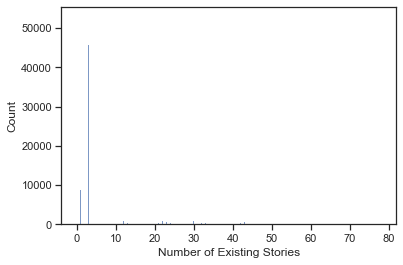

In [44]:
# fig, ax = plt.subplots()

# ax.plot(x, y, linewidth=2.0)

# ax = data['Revised Cost']

# plt.show()
# sns.lineplot(data['Revised Cost'])
sns.histplot(data['Number of Existing Stories'])

# MinMax масштабирование

In [45]:
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(data[['Number of Existing Stories']])

<AxesSubplot:ylabel='Count'>

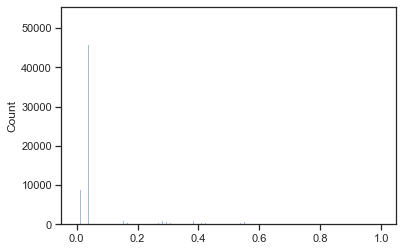

In [46]:
sns.histplot(minmax_scaled_data, legend=False)

## Масштабирование на основе Z оценки

In [47]:
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data[['Number of Existing Stories']])

<AxesSubplot:ylabel='Count'>

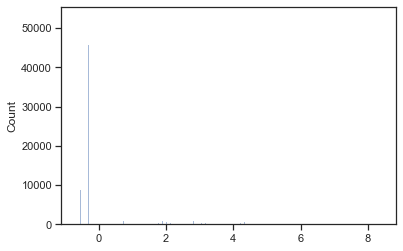

In [48]:
sns.histplot(standard_scaled_data, legend=False)